# 3 Sum

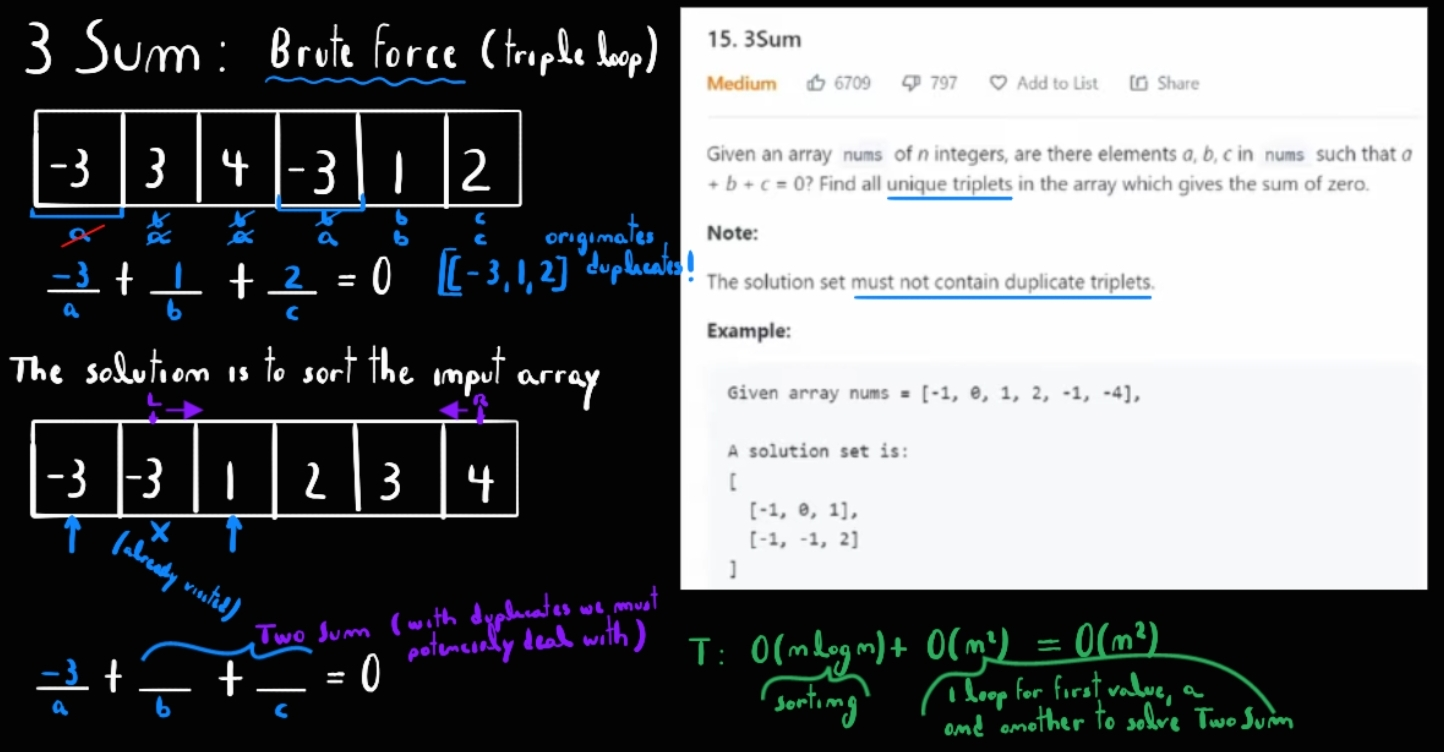

In [2]:
from typing import List


class Solution:
    def three_sum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            if i > 0 and nums[i - 1] == nums[i]:
                continue
            l, r = i + 1, len(nums) - 1
            while l < r:
                curr_sum = nums[i] + nums[l] + nums[r]
                if curr_sum > 0:
                    r -= 1
                elif curr_sum < 0:
                    l += 1
                else:
                    res.append([nums[i], nums[l], nums[r]])
                    l += 1
                    # need to update pointers in case we have
                    # duplicates in the two-sum subproblem
                    while nums[l - 1] == nums[l] and l < r:
                        l += 1
        return res


sol = Solution()
sol.three_sum([-3, 3, 4, -3, 1, 2])

[[-3, 1, 2]]